In [1]:
#IMPORT STATEMENTS
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # supress scikit 'future warnings'
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib         
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
#ERROR CALCULATING FUNCTIONS

#TEMPLATE FUNCTION
def array_create(max_val):
    return_array = []
    interval = max_val/50
    return_array.append(interval)
    for c in range (1,25):
        return_array.append((return_array[c-1] + interval))
    return return_array

#ERROR PRINTER
def err_print(perc_diff, test_vals, y_predicted):
    print("Percent differences:")
    print(np.around(perc_diff.astype(float)))
    print("Actual values:")
    print(np.around(test_vals.astype(float)))
    print("Predicted Values:")
    print(np.around(y_predicted.astype(float)))
    
#HISTOGRAM PRINTER
def hist_print(perc_diff):
    plt.hist(perc_diff, bins = array_create(np.percentile(perc_diff, 95)))
    plt.title("Error Frequency Histogram (each value on x-axis should be multiplied by 100 to attain Error in %)")
    print("Error Frequency Chart:")
    plt.show()
    
#MODEL ERROR CALCULATORS
def model_Error_Func(testing_set, test_vals, model, histogram = 0, error_report = 0, error_sort = 1, percent_change = 0):
    y_predicted = model.predict(testing_set)

    #ABSOLUTE ERROR ARRAY CREATION
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)
    perc_sum = perc_diff.sum()
    perc_inaccuracy = perc_sum/test_vals.size
    perc_accuracy = 1-(perc_inaccuracy)

    print("Average Error: " + str(perc_inaccuracy) + "%")
    
    if histogram == 1:
        hist_print(perc_diff)
    
    if error_report == 1:
        err_print(perc_diff, test_vals, y_predicted)
    
    if percent_change == 1:
        perc_change_array = np.array([])
        for i in range(0, len(perc_diff)):
            perc_change_actual = ((test_vals[i] - testing_set[i][(len(testing_set[i]) - 1)])/(testing_set[i][(len(testing_set[i]) - 1)]))*100
            perc_change_predicted = ((y_predicted[i] - testing_set[i][(len(testing_set[i]) - 1)])/(testing_set[i][(len(testing_set[i]) - 1)]))*100
            perc_change_array = np.append(perc_change_array, [perc_diff[i]*100, perc_change_predicted, perc_change_actual, y_predicted[i], test_vals[i]])
        
        perc_change_array = np.reshape(perc_change_array, (len(perc_diff),5))
        perc_change_array = perc_change_array[perc_change_array[:,1].argsort()]
        #perc_change_array = np.flip(perc_change_array)
        
        print(perc_change_array[0:15])
        print("\n\n\n")
        print(perc_change_array[-15:])
        
    return perc_inaccuracy

def mean_error(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    
    #ABSOLUTE ERROR ARRAY CREATION
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)/100
    perc_square_sum = np.sum(perc_diff**50)
    
    print("Mean Squared Error: " + str(perc_square_sum))
    
    return perc_square_sum
    
    
def model_within_val(testing_set, test_vals, val, model):
    y_predicted = model.predict(testing_set)
    
    predic_diff = y_predicted - test_vals
    #abs_diff = np.absolute(predic_diff)
    perc_diff = np.absolute(predic_diff)
    
    num_within_val = np.sum(perc_diff <= val)
    perc_within_val = num_within_val/perc_diff.size
    
    print("Percent predicted with <" + str(val) + "% error: " + str(perc_within_val*100) + "%")
    
    return perc_within_val*100

def binary_model_error(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    
    #print(y_predicted)
    #print(test_vals)
    
    #print(np.sum(y_predicted == test_vals))
    
    perc_accuracy = (np.sum(y_predicted == test_vals)/y_predicted.size) * 100
    return perc_accuracy

def money_calc(testing_set, test_vals, model, actual_perc):
    y_predicted = model.predict(testing_set)
    
    ProfitLoss = 10000
    
    #amount = ProfitLoss/5
    amount = 7500
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=7500:
            amount = 7500
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
    
    return ProfitLoss

def recent_money_calc(testing_set, test_vals, model, actual_perc, graph = 0):
    y_predicted = model.predict(testing_set)
    
    ProfitLoss = 10000
    
    graphArrX = np.arange(0,len(testing_set)+1)
    graphArrY = np.array([10000])
    
    #amount = ProfitLoss/5
    amount = 7500
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=7500:
            amount = 7500
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
        if graph == 1:  
            graphArrY = np.append(graphArrY, ProfitLoss)
    
    
    if graph == 1:
        plt.plot(graphArrX, graphArrY, color ="green")
        plt.show()
    
    return ProfitLoss

def recent_money_calc_given_arr(testing_set, test_vals, model, actual_perc, choices_arr, graph = 0):
    y_predicted = choices_arr
    
    ProfitLoss = 10000
    
    graphArrX = np.arange(0,len(testing_set)+1)
    graphArrY = np.array([10000])
    
    #amount = ProfitLoss/5
    amount = 10000
    
    for i in range(0, len(y_predicted)):
        if ProfitLoss>=0:
            amount = ProfitLoss
        else:
            amount = ProfitLoss*0.75
        
        if y_predicted[i] == 0:
            ProfitLoss += (-actual_perc[i])*(amount/100)
        if y_predicted[i] == 2:
            ProfitLoss += (actual_perc[i])*(amount/100)
        if graph == 1:  
            graphArrY = np.append(graphArrY, ProfitLoss)
    
    
    if graph == 1:
        plt.plot(graphArrX, graphArrY, color ="green")
        plt.show()
    
    return ProfitLoss

def num_chances(testing_set, test_vals, model):
    y_predicted = model.predict(testing_set)
    
    count = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
        if y_predicted[i] == 2:
            count += 1
    
    #print(count)
    #print(y_predicted.size)
    #print(count/y_predicted.size)
    
    return (count/y_predicted.size)*100

def acc_on_chances(testing_set, test_vals, model, actual_perc):
    y_predicted = model.predict(testing_set)
    
    count = 0
    
    correct = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
            if actual_perc[i] < 0:
                correct += 1
        if y_predicted[i] == 2:
            count += 1
            if actual_perc[i] > 0:
                correct += 1
            
    if count == 0:
        return count
    else:
        return (correct/count)*100
    
def acc_on_chances_given_arr(testing_set, test_vals, model, actual_perc, give_arr):
    y_predicted = give_arr
    count = 0
    
    correct = 0
    
    for i in range(0, len(y_predicted)):
        if y_predicted[i] == 0:
            count += 1
            if actual_perc[i] < 0:
                correct += 1
        if y_predicted[i] == 2:
            count += 1
            if actual_perc[i] > 0:
                correct += 1
            
    if count == 0:
        return count
    else:
        return (correct/count)*100

    
    

def predictions_to_arr(testing_set, model):
    y_predicted = model.predict(testing_set)
    
    return y_predicted





2



[[3.38256977e+03 9.80392157e+01 4.70000000e+01 1.50000000e+01]
 [3.72411022e+03 9.85436893e+01 4.82758621e+01 9.00000000e+00]
 [4.83449951e+03 9.80392157e+01 4.75000000e+01 1.40000000e+01]
 [5.08972416e+03 9.85365854e+01 4.70297030e+01 1.20000000e+01]
 [5.87746977e+03 9.95121951e+01 5.09803922e+01 1.00000000e+01]
 [6.08239659e+03 1.00000000e+02 5.00000000e+01 7.00000000e+00]
 [6.20016816e+03 9.95073892e+01 4.80198020e+01 1.90000000e+01]
 [6.20365138e+03 9.85294118e+01 5.02487562e+01 1.30000000e+01]
 [6.59254000e+03 9.90196078e+01 5.09900990e+01 1.60000000e+01]
 [6.62178377e+03 1.00000000e+02 4.70873786e+01 6.00000000e+00]
 [6.71614018e+03 9.20000000e+01 4.83695652e+01 2.90000000e+01]
 [6.72025442e+03 9.85148515e+01 5.02512563e+01 2.10000000e+01]
 [6.78852017e+03 1.00000000e+02 4.72906404e+01 1.70000000e+01]
 [6.92968355e+03 1.00000000e+02 4.77832512e+01 1.80000000e+01]
 [7.72415369e+03 9.75247525e+01 5.32994924e+01 2.20000000e+01]]


[[6.62178377e+03 1.00000000e+02 4.70873786e

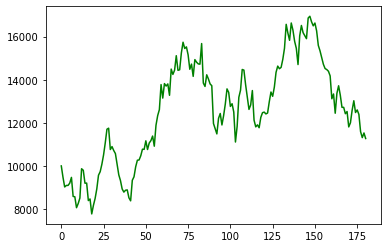

11271.998711444867

ACCURACY ON CHANCES FOR AGGREGATE:



MONEY ON SHORTS ON LAST 180 DAYS USING AGGREGATE:




MONEY ON LONGS ON LAST 180 DAYS USING AGGREGATE:





2.5



[[4.57995780e+03 9.31372549e+01 4.84210526e+01 1.50000000e+01]
 [5.15555124e+03 9.51219512e+01 4.71794872e+01 1.20000000e+01]
 [5.31984788e+03 9.85436893e+01 4.97536946e+01 9.00000000e+00]
 [6.46264288e+03 9.21568627e+01 4.94680851e+01 1.40000000e+01]
 [7.25039879e+03 9.21568627e+01 5.00000000e+01 1.60000000e+01]
 [7.25216497e+03 9.90291262e+01 5.00000000e+01 7.00000000e+00]
 [7.30614925e+03 9.41176471e+01 5.05208333e+01 1.30000000e+01]
 [8.27527226e+03 9.70731707e+01 5.27638191e+01 1.00000000e+01]
 [9.07414957e+03 9.51219512e+01 5.23076923e+01 1.10000000e+01]
 [1.09460059e+04 8.52216749e+01 5.31791908e+01 2.00000000e+01]
 [1.12532223e+04 9.35960591e+01 4.94736842e+01 1.70000000e+01]
 [1.17121914e+04 8.76237624e+01 5.31073446e+01 2.10000000e+01]
 [1.18714707e+04 9.35960591e+01 5.05263158e+01 1.80000000e+01]
 [1.3289

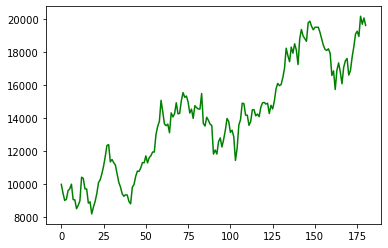

19628.380372461525

ACCURACY ON CHANCES FOR AGGREGATE:



MONEY ON SHORTS ON LAST 180 DAYS USING AGGREGATE:




MONEY ON LONGS ON LAST 180 DAYS USING AGGREGATE:





3



[[5.33361568e+03 1.00000000e+02 4.85436893e+01 9.00000000e+00]
 [5.86048119e+03 9.65853659e+01 4.79797980e+01 1.20000000e+01]
 [7.24236464e+03 9.65686275e+01 4.92385787e+01 1.60000000e+01]
 [7.27377665e+03 9.90243902e+01 5.22167488e+01 1.00000000e+01]
 [7.29974134e+03 9.50980392e+01 4.94845361e+01 1.30000000e+01]
 [8.70422426e+03 9.75609756e+01 4.95000000e+01 1.10000000e+01]
 [8.74433890e+03 9.11330049e+01 4.86486486e+01 1.80000000e+01]
 [9.24980609e+03 9.95145631e+01 5.02439024e+01 7.00000000e+00]
 [9.67800546e+03 1.00000000e+02 5.19417476e+01 8.00000000e+00]
 [1.00575922e+04 9.60784314e+01 4.94897959e+01 1.40000000e+01]
 [1.02527899e+04 9.41176471e+01 5.05208333e+01 1.50000000e+01]
 [1.08978042e+04 8.42364532e+01 5.20467836e+01 2.00000000e+01]
 [1.11480383e+04 8.71921182e+01 5.14124294e+01 1.90000000e+01]
 [1.333730

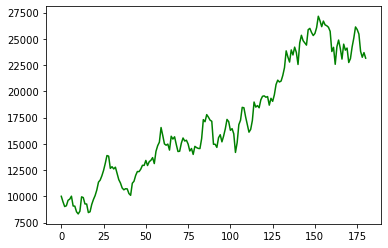

23161.808830756865

ACCURACY ON CHANCES FOR AGGREGATE:



MONEY ON SHORTS ON LAST 180 DAYS USING AGGREGATE:




MONEY ON LONGS ON LAST 180 DAYS USING AGGREGATE:





3.5



[[5.46376440e+03 9.61165049e+01 4.79797980e+01 9.00000000e+00]
 [6.66625423e+03 6.96078431e+01 4.50704225e+01 1.40000000e+01]
 [9.08164894e+03 9.75728155e+01 5.32338308e+01 8.00000000e+00]
 [9.49195434e+03 8.82926829e+01 5.13812155e+01 1.10000000e+01]
 [9.67707471e+03 1.58415842e+01 4.68750000e+01 2.30000000e+01]
 [9.77755697e+03 6.71568627e+01 4.89051095e+01 1.60000000e+01]
 [9.96062187e+03 7.46268657e+00 4.00000000e+01 2.60000000e+01]
 [1.01654100e+04 2.00000000e+00 5.00000000e+01 2.90000000e+01]
 [1.03550460e+04 7.84313725e+01 5.06250000e+01 1.30000000e+01]
 [1.04910008e+04 4.97512438e+00 5.00000000e+01 2.70000000e+01]
 [1.08404239e+04 3.00000000e+00 5.00000000e+01 2.80000000e+01]
 [1.08813489e+04 1.14427861e+01 4.34782609e+01 2.50000000e+01]
 [1.10622729e+04 1.44278607e+01 4.48275862e+01 2.40000000e+01]
 [1.1358

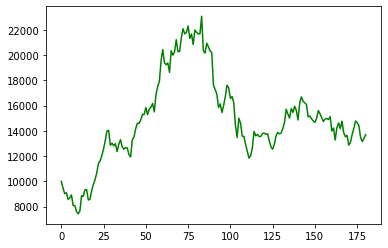

13702.59529810573

ACCURACY ON CHANCES FOR AGGREGATE:



MONEY ON SHORTS ON LAST 180 DAYS USING AGGREGATE:




MONEY ON LONGS ON LAST 180 DAYS USING AGGREGATE:





4



[[6.70305892e+03 9.22330097e+01 5.05263158e+01 7.00000000e+00]
 [6.89309628e+03 5.09803922e+01 4.80769231e+01 1.40000000e+01]
 [7.29390465e+03 2.41379310e+01 4.28571429e+01 1.80000000e+01]
 [8.40828654e+03 8.34951456e+01 5.00000000e+01 9.00000000e+00]
 [9.36779200e+03 9.75728155e+01 5.22388060e+01 6.00000000e+00]
 [9.86245243e+03 8.98058252e+01 5.35135135e+01 8.00000000e+00]
 [9.88389464e+03 5.44554455e+00 3.63636364e+01 2.20000000e+01]
 [9.90310136e+03 6.43564356e+00 4.61538462e+01 2.10000000e+01]
 [1.00000000e+04 0.00000000e+00 0.00000000e+00 2.70000000e+01]
 [1.00000000e+04 0.00000000e+00 0.00000000e+00 2.80000000e+01]
 [1.00000000e+04 0.00000000e+00 0.00000000e+00 2.90000000e+01]
 [1.00165950e+04 1.98019802e+00 2.50000000e+01 2.30000000e+01]
 [1.02136930e+04 2.98507463e+00 5.00000000e+01 2.40000000e+01]
 [1.0281466

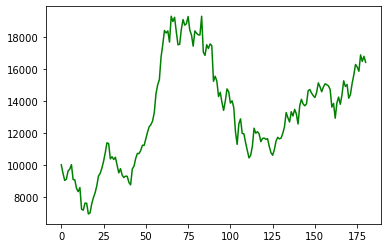

16420.290655805446

ACCURACY ON CHANCES FOR AGGREGATE:



MONEY ON SHORTS ON LAST 180 DAYS USING AGGREGATE:




MONEY ON LONGS ON LAST 180 DAYS USING AGGREGATE:



In [6]:
overallIndexNum = np.array([])
overallIndexReturns = np.array([])
superPredicOverall = np.array([])
superMoneyCheck = np.array([])
for boundIn in [2, 2.5, 3, 3.5, 4]:  
    endResult = np.array([])
    #endResult1 = np.array([])
    #endResult2 = np.array([])
    #endResult5 = np.array([])
    #endResult10 = np.array([])
    predicArr = np.array([])
    resultPredics = np.array([])
    oneDayCheck = np.array([])

    endResultMoney = np.array ([])
    endResultChances = np.array ([])
    
    #####EDIT HERE ONLY###############EDIT HERE ONLY###############EDIT HERE ONLY##########
    ###BASIC INFO#######
    crypto_traded = 'ETH'
    useModel = LinearDiscriminantAnalysis()
    
    ###TRAINING NUMBERS######
    maxCheck = 30
    minCheck = 6
    recentDays = 180
    perc_train = 0.09
    #INPUT NUMBER OVER MAX IF UNSURE
    originalTrainDays = 3000
    #INPUT NUMBER OVER MAX IF UNSURE
    daysToTrain = 3000
    #LEAVE AS 1 IF UNSURE
    #-1 if No, 1 if Yes
    mostRecentDaysYesNo = 1
    
    #TRADING INFORMATION (INPUT STOP/LIMIT AS PERCENT)
    upperTrade = 1
    lowerTrade = 1
    #PERCENT DOWN MUST GO BEFORE LOSS TAKE AND TRADE EXIT
    longStop = 5
    #PERCENT UP MUST GO BEFORE PROFIT TAKE AND TRADE EXIT
    longLimit = 100
    #PERFECT UP MUST GO BEFORE LOSS TAKE AND TRADE EXIT
    shortStop = 2.5
    #PERFECT DOWN MUST GO BEFORE PROFIT TAKE AND TRADE EXIT
    shortLimit = 30
    
    ###SUPER OVERALL MODEL INFO######
    superCheckArr = [2.5, 3.5]
    numSpecify = 10
    percSpecify = 130
    
    ###DISPLAYS ONLY#######
    #-1 if No, 1 if Yes
    showShort = 1
    showLong = 1
    #INPUT NUMBER EQUAL TO RECENTDAYS IF UNSURE
    lastValsDaysDisplay = 15
    #-1 if No, 1 if Yes
    seeSwingRate = -1
    #-1 if No, 1 if Yes
    seeOverallAccuracy = -1
    #-1 if No, 1 if Yes
    seeBestModel = 1
    #-1 if No, 1 if Yes
    seeTopDaysMoney = 1
    #NUMBER OF TOP DAY MODELS TO DISPLAY
    topManyDaysDisplay = 15
    #####EDIT HERE ONLY###############EDIT HERE ONLY###############EDIT HERE ONLY##########
    
    topManyDaysDisplay = min(topManyDaysDisplay, maxCheck-minCheck)
    lastValsDaysDisplay = min(lastValsDaysDisplay, maxCheck - minCheck)
    numSpecify = min(numSpecify, maxCheck-minCheck)
    
    percNum = 10000*(1 + (percSpecify/100))
    
    for_sophis = pd.read_csv(crypto_traded + '-USD.csv')
    for_sophis_bak = for_sophis[:]
    for_sophis = for_sophis[['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
    for_sophis = for_sophis.drop(['Date', 'Open', 'Volume', 'Adj Close'], axis=1)
    for_sophis['CloseVal'] = for_sophis['Close'].shift(1)
    for_sophis = for_sophis.dropna()
    for_sophis = for_sophis[['High', 'Low', 'CloseVal', 'Close']]
    for_sophis['Close'] = ((for_sophis['Close'] - for_sophis['CloseVal'])/for_sophis['CloseVal'])*100
    sophis_money_check = for_sophis.to_numpy()
    sophis_money_check = sophis_money_check[-recentDays:]
    #print(sophis_money_check)

    for c in range (minCheck,maxCheck):
        btc_large = pd.read_csv(crypto_traded + '-USD.csv')
        btc_large_copy = btc_large
        #print(len(btc_large))
        btc_copy_copy = btc_large
        btc_large = btc_large[['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
        #btc_large = btc_large.drop([2450])
        #btc_large = btc_large.head(originalTrainDays)

        numDaysBack = c

        numDaysBack+=1
        btc_large.columns = ['Date', 'Open', 'High' + str(numDaysBack), 'Low' + str(numDaysBack), 'Volume' + str(numDaysBack), 'Adj Close', 'Close' + str(numDaysBack)]
        btc_large_copy = btc_large

        #DROP UNNECESSARY
        btc_large = btc_large.drop(['Date', 'Open', 'Adj Close'], axis=1)


        for i in range (1,numDaysBack):
            #30-i days back
            btc_large['High' + str(numDaysBack-i)] = btc_large['High' + str(numDaysBack+1-i)].shift(-1)
            btc_large['Low' + str(numDaysBack-i)] = btc_large['Low' + str(numDaysBack+1-i)].shift(-1)
            btc_large['Volume' + str(numDaysBack-i)] = btc_large['Volume' + str(numDaysBack+1-i)].shift(-1)
            btc_large['Close' + str(numDaysBack-i)] = btc_large['Close' + str(numDaysBack+1-i)].shift(-1)

        #DAY OF
        btc_large['Close'] = btc_large['Close1'].shift(-1)

        btc_large = btc_large.dropna()

        btc_large = btc_large.reset_index(drop = True)

        btc_large['Close'] = ((btc_large['Close'] - btc_large['Close' + str(1)])/btc_large['Close' + str(1)]) * 100
        """
        for i in range (1,numDaysBack):
            btc_large['High' + str(i)] = ((btc_large['High' + str(i)] - btc_large['Close' + str(i+1)])/btc_large['Close' + str(i+1)]) * 100
            btc_large['Low' + str(i)] = ((btc_large['Low' + str(i)] - btc_large['Close' + str(i+1)])/btc_large['Close' + str(i+1)]) * 100
            btc_large['Close' + str(i)] = ((btc_large['Close' + str(i)] - btc_large['Close' + str(i+1)])/btc_large['Close' + str(i+1)]) * 100
        """

        btc_large = btc_large.iloc[: , 4:]

        btc_large['ClosePercent'] = btc_large['Close']

        btc_large['Close'] = btc_large['Close']/abs(btc_large['Close'])


        bound = boundIn
        lowBound = -bound
        upBound = bound

        btc_large.loc[btc_large['ClosePercent'] < lowBound, 'Close'] = lowBound - 1
        btc_large.loc[btc_large['ClosePercent'] > upBound, 'Close'] = upBound + 1
        btc_large.loc[abs(btc_large['ClosePercent']) < upBound, 'Close'] = 1
        btc_large.loc[btc_large['Close'] == lowBound - 1, 'Close'] = 0
        btc_large.loc[btc_large['Close'] == upBound + 1, 'Close'] = 2


        #print(btc_large)

        btc_copy_copy = btc_large
        btc_large = btc_large.head(originalTrainDays - 3*c - 9)
        btc_large = btc_large.dropna()
        btc_copy_copy = btc_copy_copy.dropna()
        if daysToTrain + recentDays < len(btc_large):
            btc_large = btc_large.tail(daysToTrain+recentDays)
        btc_large.tail()
        #print(btc_large)
        btc = btc_large
        btc_copy = btc

        #RESETTING DATA
        btc = btc_copy

        #DROPPING OUT COLUMNS TO MAXIMIZE ACCURACY
        btc = btc.drop([], axis=1)
        btc_copy_copy = btc_copy_copy.drop([], axis=1)
        #CONVERTING TO NUMPY
        btc = btc.to_numpy()
        btc_copy_copy = btc_copy_copy.to_numpy()
        #print(btc.shape)
        #print(btc_large)
        
        #print(btc)
        
        
        #SETTING TRAIN AND TEST
        X,y = btc[:,0:(np.shape(btc)[1] - 2)] , btc[:,(np.shape(btc)[1] - 2)]

        A,b = btc[:,0:(np.shape(btc)[1] - 2)] , btc[:,(np.shape(btc)[1] - 1)]
        #HighLowPerc1 = btc[:,(np.shape(btc)[1] - 6):(np.shape(btc)[1])][:[0,1,3,5]]
        
        XTest,YTest = btc_copy_copy[:,0:(np.shape(btc_copy_copy)[1] - 2)] , btc_copy_copy[:,(np.shape(btc_copy_copy)[1] - 2)]
        ATest, BTest = btc_copy_copy[:,0:(np.shape(btc_copy_copy)[1] - 2)] , btc_copy_copy[:,(np.shape(btc_copy_copy)[1] - 1)]
        #HighLowPerc2 = btc_copy_copy[:,(np.shape(btc)[1] - 6):(np.shape(btc)[1])][:[0,1,3,5]]
        
        #PRINT FIRST 10 VALUES OF EACH SET
        #print(X[0:10])
        #print(y[0:10])

        #USING PORTION OF ORIGINAL TRAINING SET TO MAKE SURE MODEL IS WORKING TO SOME DEGREE
        if mostRecentDaysYesNo == 1:
            tester = XTest[-recentDays:]
            #tester
            test_check = YTest[-recentDays:]
            moneyTester = ATest[-recentDays:]
            money_test_check = BTest[-recentDays:]
            #sophis_money_check = HighLowPerc2[-recentDays:]
        else:
            tester = X[-recentDays:]
            #tester
            test_check = y[-recentDays:]
            moneyTester = A[-recentDays:]
            money_test_check = b[-recentDays:]
            #sophis_money_check = HighLowPerc1[-recentDays:]
        
        binModErr = []
        moneyTotal = []
        numChance = []
        accChances = []
        for rand_state in range(35,36):

            # Split into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_train, shuffle = False)
            A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=perc_train, shuffle = False)

            #print(X_train)
            #print(y_train)

            #FITTING
            lin = useModel
            #rdg = GradientBoostingRegressor(random_state=21, n_estimators=400)
            #print(len(y_test))
            lin.fit(X_train, y_train.astype(int))
            
            binModErr.append(binary_model_error(X_test, y_test, lin))
            moneyTotal.append(money_calc(X_test, y_test, lin, b_test))
            numChance.append(num_chances(X_test, y_test, lin))
            accChances.append(acc_on_chances(X_test, y_test, lin, b_test))

        ap = np.array([sum(binModErr)/len(binModErr), c])
        #print(ap)
        #print(ap)
        
        if recentDays == 1:
            oneDayCheck = np.append(oneDayCheck, [lin.predict(tester), c])
        
        predicArr = np.append(predicArr, lin.predict(tester))

        endResult = np.append(endResult, ap)
        endResultMoney = np.append(endResultMoney, [sum(moneyTotal)/len(moneyTotal), sum(numChance)/len(numChance), sum(accChances)/len(accChances), c])
        endResultChances = np.append(endResultChances, [sum(numChance)/len(numChance), c])


    if recentDays == 1:
        oneDayCheck = np.reshape(oneDayCheck, (maxCheck-minCheck,recentDays+1))
    predicArr = np.reshape(predicArr, (maxCheck-minCheck, recentDays))
    resultPredics = np.mean(predicArr, axis = 0)
    tempPredics = np.array([])
    if boundIn in superCheckArr:
        #if superPredicOverall.size == 0:
        superPredicOverall = np.append(superPredicOverall, resultPredics)
        #else:
        #    superPredicOverall = np.sum(superPredicOverall, resultPredics)
    tempPredics = np.where(resultPredics>upperTrade,2,resultPredics)
    money_check_arr = np.where(tempPredics<lowerTrade,0,tempPredics)
    #np.where(resultPredics>1,2, np.searchsorted([40,50,60,70,80,90], x)+3)
    if boundIn in superCheckArr:
        superMoneyCheck = np.append(superMoneyCheck, money_check_arr)
    endResult = np.reshape(endResult, (maxCheck-minCheck,2))
    endResultMoney = np.reshape(endResultMoney, (maxCheck-minCheck,4))
    endResultChances = np.reshape(endResultChances, (maxCheck-minCheck,2))

    endResult = endResult[endResult[:,0].argsort()]
    endResultMoney = endResultMoney[endResultMoney[:,0].argsort()]
    endResultChances = endResultChances[endResultChances[:,0].argsort()]


    print("\n\n\n")
    print(bound)
    if seeOverallAccuracy == 1:
        print("\n\n")
        print(endResult[0:topManyDaysDisplay])
        print("\n")
        print(endResult[-topManyDaysDisplay:])
    if seeTopDaysMoney == 1:
        print("\n\n")
        print(endResultMoney[0:topManyDaysDisplay])
        print("\n")
        print(endResultMoney[-topManyDaysDisplay:])
    #print("\n\n")
    #print(y_test.size)
    if seeSwingRate == 1:
        print(endResultChances[0:topManyDaysDisplay])
        print("\n")
        print(endResultChances[-topManyDaysDisplay:])
    print("\nPREDICTIONS FOR DAYS")
    print(resultPredics[-lastValsDaysDisplay:])
    #print("\n\n")
    #print(predicArr)
    #print("\nACTUAL DATA SET\n\n")
    #print(tester)
    #print("\n\nACTUAL RESULTS")
    #print(test_check)
    print("checking:")
    print(money_check_arr[-lastValsDaysDisplay:])
    if recentDays == 1:
        print("WHICH MODELS PREDICTED WHAT:\n")
        print(oneDayCheck)
        print("OVERALL VAL:")
        print(resultPredics)
    #print("\n\n\nMONEY ON LAST " + str(recentDays) +  " DAYS USING AGGREGATE (choiceNonBinary):\n")
    #print(recent_money_calc(tester, test_check, lin, money_test_check, graph = 1))
    print("\n\n\nMONEY ON LAST " + str(recentDays) +  " DAYS USING AGGREGATE:\n")
    print(recent_money_calc_given_arr(tester, test_check, lin, money_test_check, money_check_arr, graph = 1))
    #sophisticated_money(sophis_money_check, money_check_arr, longStop, longLimit, shortStop, shortLimit, graph = 1)
    print("\nACCURACY ON CHANCES FOR AGGREGATE:")
    #print(str(acc_on_chances_given_arr(tester, test_check, lin, money_test_check, money_check_arr)) + "%\n")
    if (showShort == 1):
        print("\n\n\nMONEY ON SHORTS ON LAST " + str(recentDays) +  " DAYS USING AGGREGATE:\n")
        #print(short_money_calc_given_arr(tester, test_check, lin, money_test_check, money_check_arr, graph = 1))
        #sophisticated_short(sophis_money_check, money_check_arr, shortStop, shortLimit, graph=1)
    if (showLong == 1):
        print("\n\n\nMONEY ON LONGS ON LAST " + str(recentDays) +  " DAYS USING AGGREGATE:\n")
        #print(long_money_calc_given_arr(tester, test_check, lin, money_test_check, money_check_arr, graph = 1))
        #sophisticated_long(sophis_money_check, money_check_arr, longStop, longLimit, graph=1)